In [2]:
Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does thedataset have?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_excel('flight_price.xlsx')
df

Object `have` not found.


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [6]:
#cleaning the data
df['date']=df['Date_of_Journey'].str.split('/').str[0]
df['month']=df['Date_of_Journey'].str.split('/').str[1]
df['year']=df['Date_of_Journey'].str.split('/').str[2]
df.drop('Date_of_Journey',axis=1,inplace=True)
df['Dep_hours']=df['Dep_Time'].str.split(':').str[0]
df['Dep_mins']=df['Dep_Time'].str.split(':').str[1]
df
df['Dep_hours']=df['Dep_Time'].str.split(':').str[0]
df['Dep_mins']=df['Dep_Time'].str.split(':').str[1]
df
df['Arrival_hour']=df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[0]
df['Arrival_mins']=df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[1]
df.drop('Arrival_Time',axis=1,inplace=True)
df
def convert_into_minutes(Duration):
  total_minutes=0
  for i in Duration.split():
    if 'h' in i:
      total_minutes+= int(i.replace('h',''))*60
    if 'm' in i:
      total_minutes+=int(i.replace('m',''))
  return total_minutes
df['Duration']=df['Duration'].apply(convert_into_minutes)
df
df['Additional_Info'].value_counts()
df.drop(['Additional_Info','Route'],axis=1,inplace=True)
df['Airline'].value_counts()
df['Airline']=df['Airline'].map({'Jet Airways':1, 'IndiGo':2, 'Air India':3, 'Multiple carriers':4 })
df['Source'].value_counts()
df['Destination'].value_counts()
df['Total_Stops'].value_counts()
df['Total_Stops']=df['Total_Stops']
df[['date','month','year','Dep_hours','Dep_mins','Arrival_hour','Arrival_mins']]=df[['date','month','year','Dep_hours','Dep_mins','Arrival_hour','Arrival_mins']].astype(int)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Airline       8850 non-null   float64
 1   Source        10683 non-null  object 
 2   Destination   10683 non-null  object 
 3   Dep_Time      10683 non-null  object 
 4   Duration      10683 non-null  int64  
 5   Total_Stops   10682 non-null  object 
 6   Price         10683 non-null  int64  
 7   date          10683 non-null  int64  
 8   month         10683 non-null  int64  
 9   year          10683 non-null  int64  
 10  Dep_hours     10683 non-null  int64  
 11  Dep_mins      10683 non-null  int64  
 12  Arrival_hour  10683 non-null  int64  
 13  Arrival_mins  10683 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 1.1+ MB


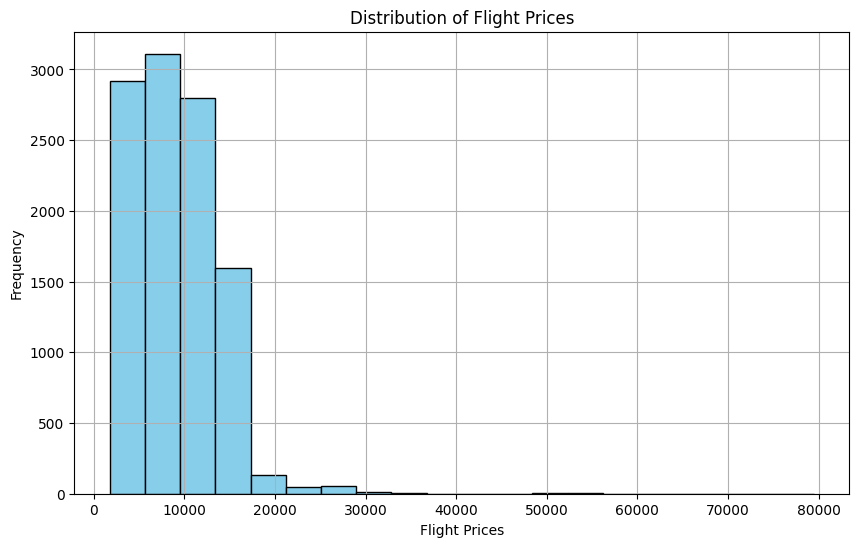

In [8]:
#Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the
#distribution.
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Flight Prices')
plt.ylabel('Frequency')
plt.title('Distribution of Flight Prices')
plt.grid(True)
plt.show()

In [11]:
#Q3. What is the range of prices in the dataset? What is the minimum and maximum price?
minimum_price = df['Price'].min()
maximum_price = df['Price'].max()
price_range = maximum_price - minimum_price
print(f"Minimum price: {minimum_price}")
print(f"Maximum price: {maximum_price}")
print(f"Range of prices: {price_range}")

Minimum price: 1759
Maximum price: 79512
Range of prices: 77753


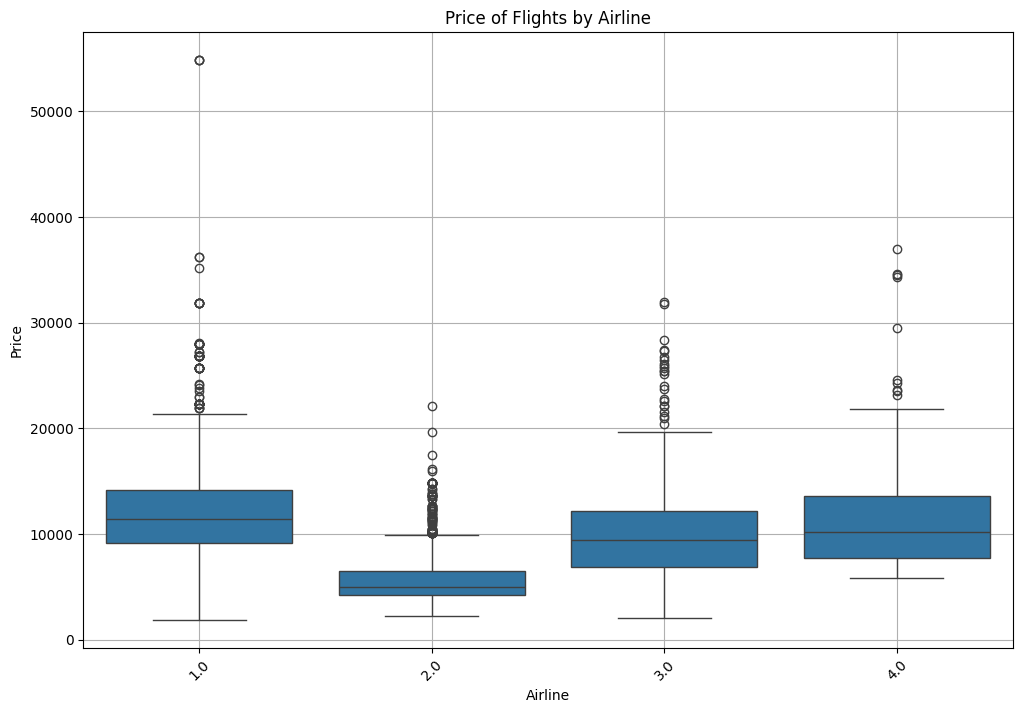

In [13]:
#Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of differentairlines.
plt.figure(figsize=(12, 8))
sns.boxplot(x=df['Airline'], y=df['Price'], data=df)
plt.xlabel('Airline')
plt.ylabel('Price')
plt.title('Price of Flights by Airline')
plt.xticks(rotation=45)  # Rotate airline labels for better readability
plt.grid(True)
plt.show()

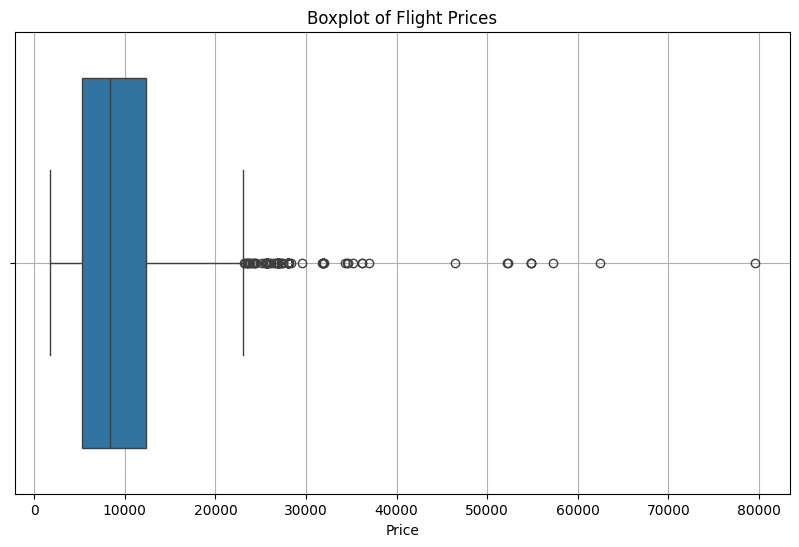

In [17]:
#Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Price'], data=df)
plt.xlabel('Price')
plt.title('Boxplot of Flight Prices')
plt.grid(True)
plt.show()

#With the graph you can see that there is too many outliers which lies above the whisker and they will gonna impact the statistics as well as the visualization.

In [ ]:
#Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price datasetto identify the peak travel season. What features would you analyze to identify the peak season, and howwould you present your findings to your boss?
#Date or Time of Booking: Analyze the frequency of flight bookings over time. Look for periods with a significant increase in bookings, indicating high demand and potentially peak travel season.
#Flight Prices: Examine the average flight prices over time. Peak travel seasons often coincide with higher prices due to increased demand.
#Flight Occupancy: Analyze the occupancy rates of flights during different periods. Higher occupancy rates suggest peak travel seasons when more people are traveling.
#Holiday and Event Calendar: Consider holidays, festivals, and major events that may influence travel patterns. For example, peak travel seasons often coincide with major holidays or events such as Christmas, New Year, summer vacations, etc.
#Historical Data: Analyze historical data from previous years to identify recurring patterns and trends in travel demand.

In [ ]:
#Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the FlightPrice dataset to identify any trends in flight prices. What features would you analyze to identify thesetrends, and what visualizations would you use to present your findings to your team?
#To present these findings, I would use the following visualizations:
#Time Series Plots: Displaying time series plots of flight prices over time, segmented by relevant features such as route, airline, and booking class, to visualize trends and seasonal patterns.
#Boxplots or Violin Plots: Utilizing boxplots or violin plots to compare price distributions across different categories (e.g., airlines, routes, booking classes) and identify variations and outliers.
#Heatmaps: Creating heatmaps to visualize the average prices across different combinations of features (e.g., airline vs. booking class) to identify pricing trends and relationships.
#Scatter Plots: Generating scatter plots to explore correlations between flight prices and other factors (e.g., booking lead time) to uncover insights into pricing dynamics.
#Regression Analysis: Conducting regression analysis to quantify the impact of various factors on flight prices and identify significant trends and relationships

In [ ]:
#Q8. You are a data scientist working for an airline company, and you have been asked to analyze theFlight Price dataset to identify the factors that affect flight prices. What features would you analyze toidentify these factors, and how would you present your findings to the management team?
#To present the I will use the following approach
#Executive Summary: Provide a concise summary of the key findings and insights regarding the factors influencing flight prices.
#Data Visualization: Utilize interactive dashboards, charts, and graphs to visually present the analysis results, showcasing trends and correlations among different features affecting flight prices.
#Regression Analysis: Conduct statistical regression analysis to quantify the impact of various factors on flight prices and provide insights into the magnitude and significance of these effects.
#Recommendations: Offer actionable recommendations based on the analysis findings, such as optimizing pricing strategies, adjusting capacity allocation, and enhancing marketing efforts to maximize revenue and profitability.
#Discussion and Insights: Facilitate a discussion with the management team to delve deeper into the implications of the analysis findings and explore potential strategies for addressing the identified factors affecting flight prices.

In [18]:
#Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns doesthe dataset have?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv")
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [19]:
#cleaning the dataset
df.isnull().sum()
df['Reviews'].unique()
df['Reviews'].str.isnumeric().sum()
df[~df['Reviews'].str.isnumeric()]
df['Reviews']=df['Reviews'].str.replace('3.0M','30000000')
df['Reviews']=df['Reviews'].astype('int')
df.drop(index=10472,inplace=True)
df['Size'].unique()
def convert_size(size):
  if 'M' in size:
    return(int(float(size.replace('M',''))*1000))
  elif 'K' in size:
    return(float(size.replace('K','')))
  elif 'Varies with device' in size:
    return np.nan
  else:
    return np.nan
    x
int('200M'.replace('M',''))*1000
df['Size']=df['Size'].apply(convert_size)
df['Installs'].unique()
df['Price'].unique()
cols=['Installs','Price']
chars_to_remove=['+',',','$']
for i in cols:
  for j in chars_to_remove:
    df[i]=df[i].str.replace(j,'')
df['Price']=df['Price'].astype('float')
df['Installs']=df['Installs'].astype('int')
df['date']=df['Last Updated'].str.split(' ').str[1]
df['month']=df['Last Updated'].str.split(' ').str[0]
df['year']=df['Last Updated'].str.split(' ').str[2]
df.drop_duplicates(subset=['App'],keep='last',inplace=True)
df

<ipython-input-19-e9c156948082>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Reviews']=df['Reviews'].str.replace('3.0M','30000000')
<ipython-input-19-e9c156948082>:28: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[i]=df[i].str.replace(j,'')


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,date,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,"7,",January,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,"1,",August,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,"8,",June,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,"20,",June,2018
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,"26,",March,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,"25,",July,2017
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.0,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,"6,",July,2018
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500.0,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,"20,",January,2017
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,"19,",January,2015


In [20]:
df['App'].duplicated().sum()

0

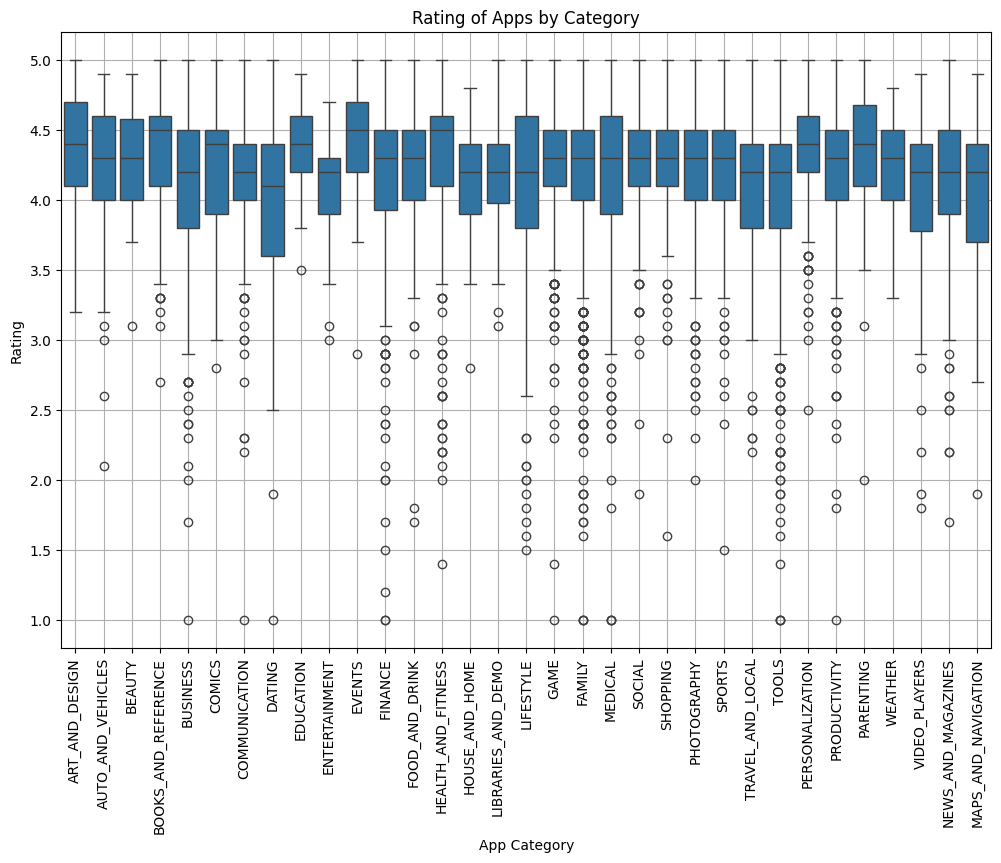

In [24]:
#Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of differentapp categories.
plt.figure(figsize=(12, 8))
sns.boxplot(x=df['Category'], y=df['Rating'], data=df)
plt.xlabel('App Category')
plt.ylabel('Rating')
plt.title('Rating of Apps by Category')
plt.xticks(rotation=90)  # Rotate category labels for better readability
plt.grid(True)
plt.show()

In [25]:
#Q11. Are there any missing values in the dataset? Identify any missing values and describe how they mayimpact your analysis.
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)
total_cells = df.shape[0] * df.shape[1]
total_missing = missing_values.sum()
percentage_missing = (total_missing / total_cells) * 100
print(f"\nPercentage of Missing Values: {percentage_missing:.2f}%")

#The presence of missing values is crucial because they can impact the analysis in several ways:

#Biased Analysis: If missing values are not handled properly, they can lead to biased analysis and inaccurate results, as missing data may not be representative of the overall dataset.\
#Reduced Sample Size: Missing values reduce the effective sample size for analysis, potentially reducing the statistical power and reliability of the results.
#Incomplete Insights: Missing values may lead to incomplete insights or incomplete understanding of the relationships between variables, as they can affect calculations of summary statistics and correlations.
#Data Imputation Challenges: Handling missing values requires careful consideration and selection of appropriate imputation methods, which can introduce uncertainty and variability into the analysis.

Missing Values:
 App                  0
Category             0
Rating            1463
Reviews              0
Size              1541
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
date                 0
month                0
year                 0
dtype: int64

Percentage of Missing Values: 1.95%


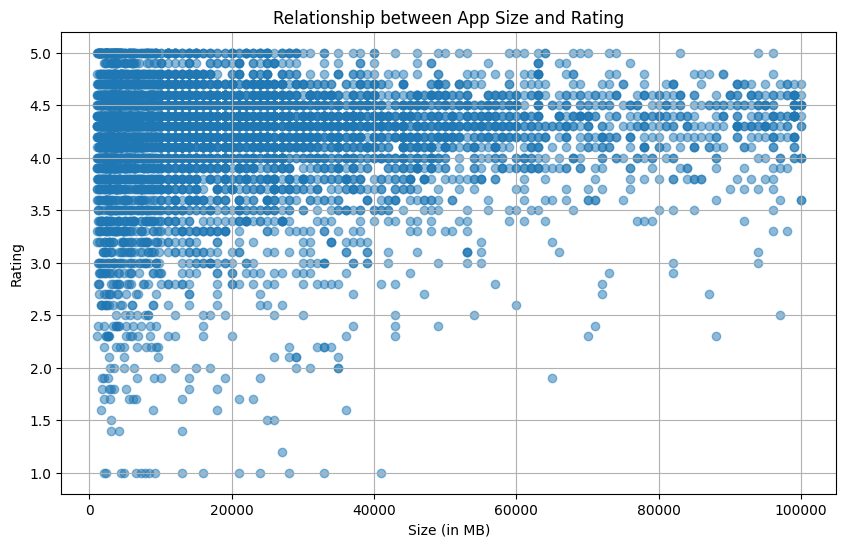

In [26]:
#Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualizethe relationship.
plt.figure(figsize=(10, 6))
plt.scatter(df['Size'], df['Rating'], alpha=0.5)
plt.xlabel('Size (in MB)')
plt.ylabel('Rating')
plt.title('Relationship between App Size and Rating')
plt.grid(True)
plt.show()

#With the below graph we can examine that with respect to increase in size of app, the rating is getting decrease.

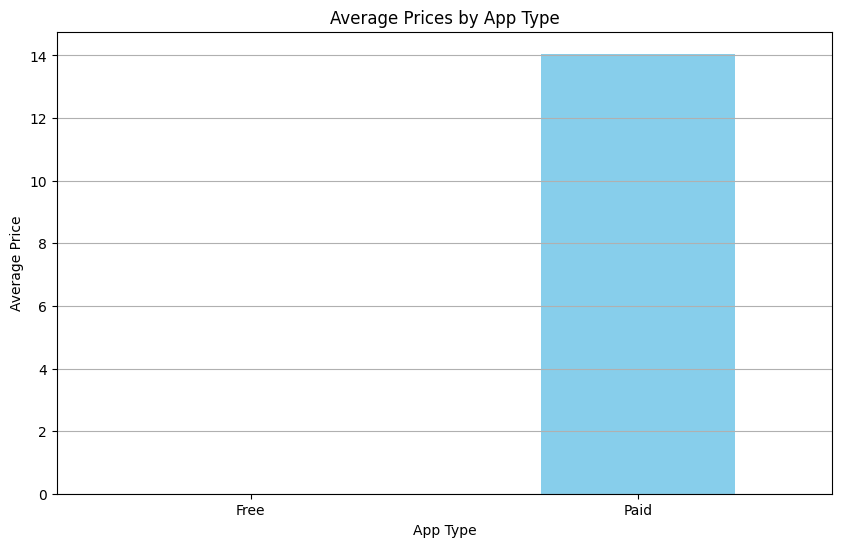

In [27]:
#Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.
average_prices = df.groupby('Type')['Price'].mean()
plt.figure(figsize=(10, 6))
average_prices.plot(kind='bar', color='skyblue')
plt.xlabel('App Type')
plt.ylabel('Average Price')
plt.title('Average Prices by App Type')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()



In [30]:
#Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the appswith the highest number of installs.
install_freq = df['Installs'].value_counts()
top_10_apps = install_freq.head(10)
print("Top 10 Most Popular Apps by Number of Installs:")
print(top_10_apps)

freq_table=df.groupby(['App','Installs']).size().reset_index(name='Frequency')
print(freq_table)

Top 10 Most Popular Apps by Number of Installs:
1000000     1419
100000      1114
10000       1031
10000000     933
1000         887
100          709
5000000      607
500000       504
50000        469
5000         468
Name: Installs, dtype: int64
                                                   App  Installs  Frequency
0                 "i DT" Fútbol. Todos Somos Técnicos.       500          1
1                        +Download 4 Instagram Twitter   1000000          1
2                           - Free Comics - Comic Apps     10000          1
3                                                   .R     10000          1
4                                               /u/app     10000          1
...                                                ...       ...        ...
9654                           뽕티비 - 개인방송, 인터넷방송, BJ방송    100000          1
9655                                        💎 I'm rich     10000          1
9656     💘 WhatsLov: Smileys of love, stickers and GIF   1000000     

In [ ]:
#Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze theGoogle Playstore dataset to identify the most popular app categories. How would you approach thistask, and what features would you analyze to make recommendations to the company?
#To identify the most popular app categories for launching a new app on the Google Play Store, I would approach the task by analyzing the Google Play Store dataset and focusing on the following features:
#Category: Analyze the distribution of apps across different categories to identify popular and competitive categories with high user engagement.
#Number of Installs: Examine the number of installs for each app category to determine the popularity and demand for apps within those categories.
#Rating: Evaluate the average ratings of apps within each category to understand user satisfaction and reception, which can influence the success of a new app.
#Reviews: Assess the number of reviews for apps within each category as an indicator of user engagement and activity level.
#Size and Price: Consider the average size and price of apps within each category to understand user preferences and willingness to pay.

In [ ]:
#Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify themost successful app developers. What features would you analyze to make recommendations to thecompany, and what data visualizations would you use to present your findings?
#To identify the most successful app developers in the Google Play Store dataset, I would analyze the following features to make recommendations to the company:
#Number of Downloads/Installs: Analyze the total number of downloads or installs for each app developer's apps to measure their success in terms of user adoption and popularity.
#App Ratings: Evaluate the average ratings of apps developed by each developer to assess user satisfaction and the quality of their apps.
#Number of Apps: Examine the total number of apps developed by each developer to understand their level of activity and contribution to the marketplace.
#App Categories: Analyze the distribution of apps across different categories to identify developers who specialize in popular and high-demand categories.
#Reviews: Assess the total number of reviews for apps developed by each developer as an indicator of user engagement and feedback.
#To present these findings to the company, I would use the following data visualizations:
#Bar Chart: Create a bar chart to compare the total number of downloads or installs for apps developed by different developers, highlighting the top performers.
#Boxplot: Utilize a boxplot to compare the distribution of app ratings across different developers, showcasing the median ratings and identifying outliers.
#Pie Chart: Generate a pie chart to visualize the distribution of app categories developed by each developer, highlighting their specialization areas.
#Scatter Plot: Create a scatter plot to visualize the relationship between the number of apps developed by each developer and their average app ratings, identifying developers with a high volume of apps and consistently high ratings.
#Heatmap: Utilize a heatmap to visualize the correlation matrix between different metrics such as number of downloads, average ratings, and number of reviews for apps developed by each developer, identifying patterns and relationships.*'/

In [ ]:
#Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time tolaunch a new app. What features would you analyze to make recommendations to the company, andwhat data visualizations would you use to present your findings?
#To identify the best time to launch a new app in the Google Play Store dataset, I would analyze the following features to make recommendations to the marketing research firm:
#Date of Release: Analyze the distribution of app releases over time to identify trends and patterns in app launches.
#Seasonality: Examine the popularity of app launches during different seasons or months to identify peak periods of user engagement and app downloads.
#Number of Installs: Evaluate the number of installs for apps launched during different time periods to understand the impact of launch timing on user adoption.
#Average Ratings: Assess the average ratings of apps launched during different time periods to gauge user satisfaction and reception.
#To present these findings, I would use the following data visualizations:
#Time Series Plot: Create a time series plot to visualize the distribution of app releases over time, highlighting trends and patterns in launch timing.
#Bar Chart: Generate a bar chart to compare the number of installs or average ratings of apps launched during different months or seasons, highlighting peak periods of user engagement.
#Heatmap: Utilize a heatmap to visualize the correlation between app launch timing and the number of installs or average ratings, identifying optimal time periods for app launches.